# Lab 8: Define and Solve an ML Problem of Your Choosing

In [21]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [22]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [23]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the data set for the AirBnB listings in NYC. 
2. I will be predicting the neighborhood (neighborhood_group_cleansed) of each listing.
3. This is a supervised learning, multi-class classification problem.
4. My features will be price, accomodates, bathrooms, bedrooms, beds, name, description, neighborhood_overview, availability_365, review_scores_rating, room_type, host_is_superhost, etc. 
5. Accurately predicting the neighborhood from these features can help with fraud detection, search optimization by classifying listings that may be missing the neighborhood, personalized offers for customers, and to tailor marketing strategies. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [24]:
# Check Data Types and Missing Values
print(df.dtypes)
print(df.isnull().sum())

# Check Summary
print(df.describe())

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [25]:
# Drop Text Columns with Lots of Missing Values or Low Value
df.drop(columns = ['host_about', 'host_response_rate', 'host_name', 'name', 'host_location'], inplace = True)

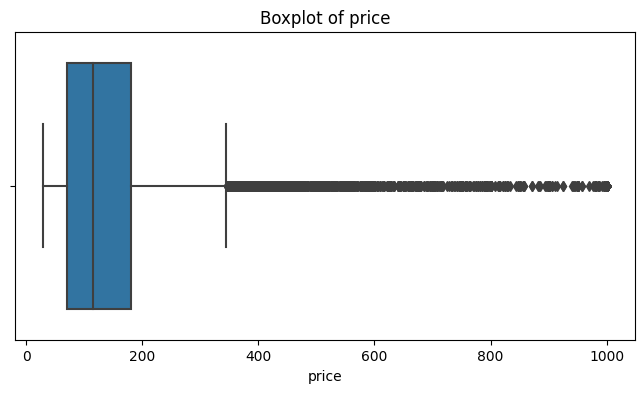

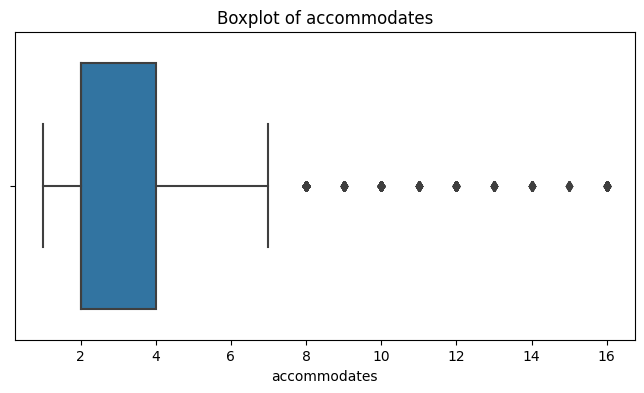

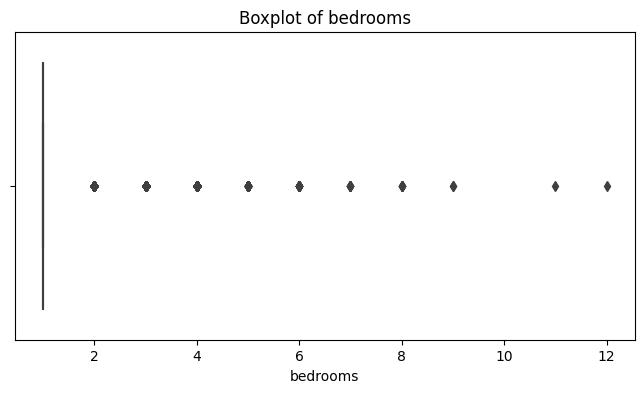

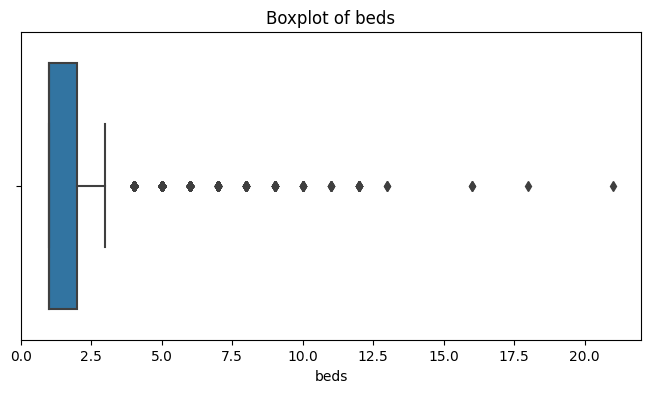

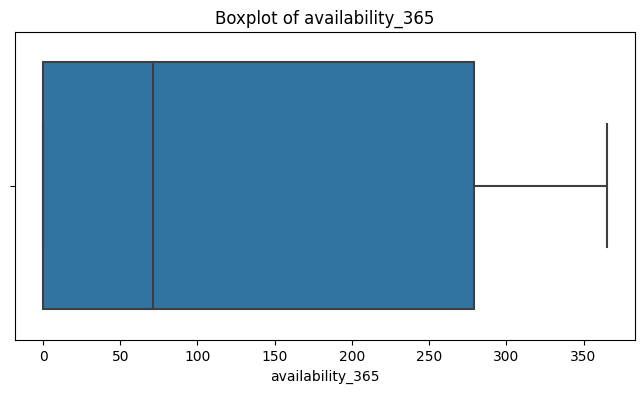

In [26]:
# Check for Outliers

import seaborn as sns
import matplotlib.pyplot as plt

ncols = ['price', 'accommodates','bedrooms', 'beds', 'availability_365']

for col in ncols:
    plt.figure(figsize = (8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [27]:
df.rename(columns = {'neighbourhood_group_cleansed': 'neighbourhood_group'}, inplace=True)

In [28]:
# Handle Outliers by capping at 99th percentile

for col in ['price','accommodates','beds','bedrooms']:
    upper_limit = df[col].quantile(0.99)
    df = df[df[col] <= upper_limit]
    
print(f"Data Shape after outlier removal: {df.shape}")

Data Shape after outlier removal: (23151, 45)


In [29]:
# Use Median for Numerical Columns
df['bedrooms'].fillna(df['bedrooms'].median(), inplace = True)
df['beds'].fillna(df['beds'].median(), inplace = True)

# Imput Missing for Text Columns
df['description'].fillna('missing', inplace=True)
df['neighborhood_overview'].fillna('missing', inplace=True)

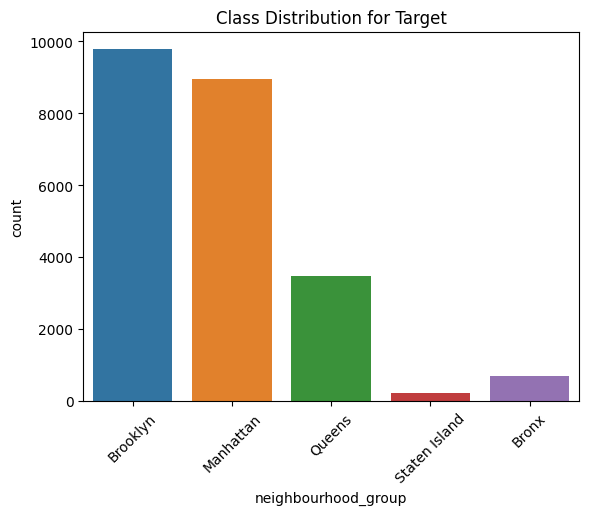

Brooklyn         0.422487
Manhattan        0.386808
Queens           0.150317
Bronx            0.030323
Staten Island    0.010064
Name: neighbourhood_group, dtype: float64


In [30]:
# Check Class Balance for Label
sns.countplot(x='neighbourhood_group',data=df)
plt.title("Class Distribution for Target")
plt.xticks(rotation=45)
plt.show()

print(df['neighbourhood_group'].value_counts(normalize=True))

In [31]:
# Select Features I will be Using

selected_features = [
    'price','accommodates','bedrooms','beds','availability_365','room_type','host_is_superhost','description'
]

In [32]:
# Get features for encoding

categorical_cols = ['room_type','neighbourhood_group']
print("Unique values per categorical column:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Unique values per categorical column:
room_type: 4 unique values
neighbourhood_group: 5 unique values


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the data and removing high-missing and potentially leaky features the final feature set includes: price, accomodates, bedrooms, beds, availability_365, room_type, and description. I decided to remove host_about, host_response_rate, host_name, host_is_superhost, host_location, and name since these would provide low predictive value and neigborhood_overview was dropped to avoid leakage. 

To prepare my data for modeling I replaced missing values by inputing the median for bedrooms and beds and replacing missing descriptions with 'missing'. I removed outliers by capping them at the 99th percentile. For the description I will use TF-IDF to convert this text into numerical features and standardize numeric features when using models sensitive to feature magnitude such as logistic regression.

For my model I want to try two inital models: logistic regression and a random forest classifier. I will use an 80/20 split for testing and training and apply a 5 fold cross validation to compare model performance and reduce overfitting. To analyze performance I will look at accuracy, f-1 score, and a confusion matrix. To improve my model I will tune hyperparameters such as regularization for logistic regression and number of trees in the random forest. I will also experiment with feature relationships, consider dimensionality reduction, and use class weighting if predictions are biased due to imbalance. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [34]:
# Define Features and Label

X = df.drop(columns = ['neighbourhood_group'])
y = df['neighbourhood_group']

In [35]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
# Preprocessing for each col type

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[['price','accommodates','bedrooms','beds','availability_365']])
X_test_num = scaler.fit_transform(X_test[['price','accommodates','bedrooms','beds','availability_365']])

encoder = OneHotEncoder(drop = 'first', sparse_output =False)
X_train_cat = encoder.fit_transform(X_train[['room_type']])
X_test_cat = encoder.transform(X_test[['room_type']])

vectorizer = TfidfVectorizer(max_features=100)
X_train_text = vectorizer.fit_transform(X_train['description']).toarray()
X_test_text = vectorizer.transform(X_test['description']).toarray()

X_train_final = np.hstack([X_train_num, X_train_cat, X_train_text])
X_test_final = np.hstack([X_test_num, X_test_cat, X_test_text])

In [37]:
# Logistic Regression

print("Logistic Regression")
lr_model = LogisticRegression(max_iter=1000, multi_class = 'multinomial')
lr_model.fit(X_train_final, y_train)
y_pred_lr = lr_model.predict(X_test_final)

print("LR Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression
LR Results:
               precision    recall  f1-score   support

        Bronx       0.50      0.01      0.01       133
     Brooklyn       0.71      0.72      0.72      1942
    Manhattan       0.70      0.81      0.75      1769
       Queens       0.56      0.46      0.51       730
Staten Island       0.00      0.00      0.00        57

     accuracy                           0.68      4631
    macro avg       0.49      0.40      0.40      4631
 weighted avg       0.67      0.68      0.67      4631

Confusion Matrix: 
 [[   1   53   35   44    0]
 [   0 1403  406  133    0]
 [   0  279 1428   62    0]
 [   1  210  181  338    0]
 [   0   31    4   22    0]]


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [38]:
# Random Forest
print("Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model.predict(X_test_final)

print("RF Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))


Random Forest
RF Results:
               precision    recall  f1-score   support

        Bronx       0.76      0.10      0.17       133
     Brooklyn       0.72      0.75      0.73      1942
    Manhattan       0.69      0.86      0.76      1769
       Queens       0.70      0.37      0.48       730
Staten Island       1.00      0.18      0.30        57

     accuracy                           0.70      4631
    macro avg       0.77      0.45      0.49      4631
 weighted avg       0.71      0.70      0.68      4631

Confusion Matrix: 
 [[  13   50   43   27    0]
 [   2 1450  434   56    0]
 [   1  229 1515   24    0]
 [   1  252  208  269    0]
 [   0   34    6    7   10]]


In [39]:
print(y.value_counts(normalize=True))

Brooklyn         0.422487
Manhattan        0.386808
Queens           0.150317
Bronx            0.030323
Staten Island    0.010064
Name: neighbourhood_group, dtype: float64


In [40]:
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial',class_weight='balanced')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [41]:
#Evaluate LR Again
lr_model.fit(X_train_final, y_train)
y_pred_lr = lr_model.predict(X_test_final)

print("LR Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))

LR Results:
               precision    recall  f1-score   support

        Bronx       0.09      0.45      0.15       133
     Brooklyn       0.85      0.56      0.68      1942
    Manhattan       0.73      0.71      0.72      1769
       Queens       0.42      0.39      0.40       730
Staten Island       0.11      0.60      0.18        57

     accuracy                           0.59      4631
    macro avg       0.44      0.54      0.43      4631
 weighted avg       0.71      0.59      0.63      4631

Confusion Matrix: 
 [[  60   10   16   28   19]
 [ 205 1088  338  209  102]
 [ 171  129 1253  152   64]
 [ 204   45  101  282   98]
 [  14    1    1    7   34]]


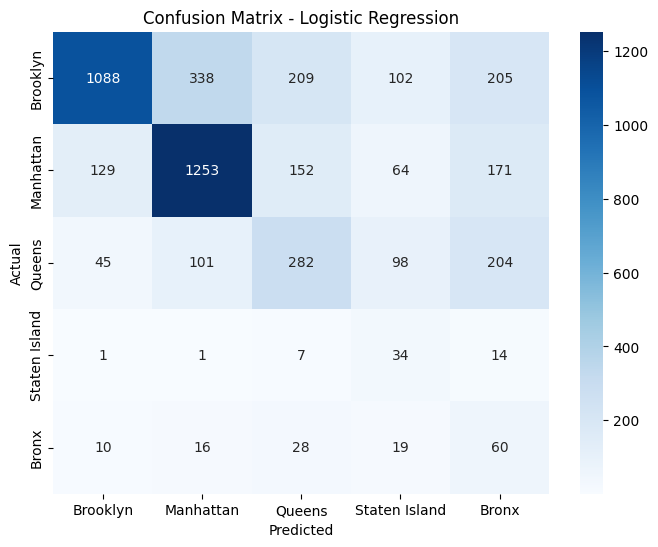

In [42]:
# Cmatrix as heatmap

labels = y.unique()

cm=confusion_matrix(y_test, y_pred_lr, labels = labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues',xticklabels = labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
# Evaluate RF Again

rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model.predict(X_test_final)

print("RF Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))


RF Results:
               precision    recall  f1-score   support

        Bronx       0.81      0.10      0.17       133
     Brooklyn       0.72      0.73      0.72      1942
    Manhattan       0.66      0.87      0.75      1769
       Queens       0.75      0.34      0.47       730
Staten Island       1.00      0.14      0.25        57

     accuracy                           0.69      4631
    macro avg       0.79      0.43      0.47      4631
 weighted avg       0.71      0.69      0.67      4631

Confusion Matrix: 
 [[  13   56   41   23    0]
 [   2 1411  491   38    0]
 [   1  213 1538   17    0]
 [   0  250  232  248    0]
 [   0   28   15    6    8]]


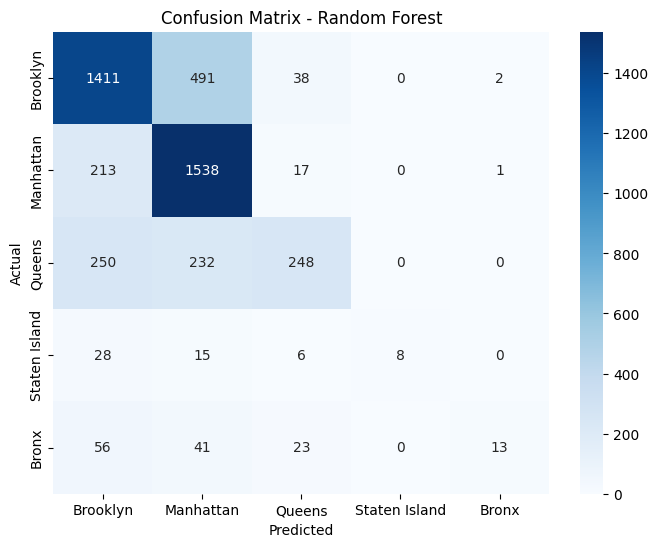

In [44]:
# Cmatrix as heatmap

labels = y.unique()

cm=confusion_matrix(y_test, y_pred_rf, labels = labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues',xticklabels = labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
# RF with GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state=42, class_weight = 'balanced'),
    param_grid = param_grid,
    cv=3,
    scoring = 'f1_macro',
    n_jobs = -1,
    verbose = 1
)

grid_search.fit(X_train_final, y_train)
best_rf = grid_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test_final)

print("Tuned RF Results:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Tuned RF Results:
               precision    recall  f1-score   support

        Bronx       0.13      0.30      0.18       133
     Brooklyn       0.90      0.52      0.66      1942
    Manhattan       0.66      0.84      0.74      1769
       Queens       0.45      0.57      0.50       730
Staten Island       0.60      0.21      0.31        57

     accuracy                           0.64      4631
    macro avg       0.55      0.49      0.48      4631
 weighted avg       0.71      0.64      0.65      4631



I evaluated both Logistic Regression and Random Forest on a multiclass classification task predicting the borough of NYC Airbnb listings. Class imbalance was a challenge as Manhattan and Brooklyn dominated the data and Bronx and Staten Island were underrepresented. To address this I applied class_weight = 'balanced', which significantly improved the recall of minority classes in Logistic Regression. While Random Forest achieved higher accuracy at 69%, the recall for Bronx and Staten Island remained low. 

I used GridSearchCV to tune hyperparameters for the Random Forest and saw an improvement in recall and F-1 score for the Bronx and Staten Island. Macro F-1 score also increased and accuracy remained strong. 